In [1]:
from finquant.portfolio import build_portfolio
import pandas as pd
import numpy as np

In [2]:
import os
dirname = os.getcwd()
parent_dirname = os.path.dirname(dirname)

In [3]:
import matplotlib.pyplot as plt

In [4]:
# Read in price data
df = pd.read_csv(os.path.join(parent_dirname, 'data/raw/sti_adj_price_daily_OCBC.csv'),
                 parse_dates=True, 
                 index_col="Date")

In [5]:
# Build portfolio
pf = build_portfolio(data=df)
pf.risk_free_rate = 0.02

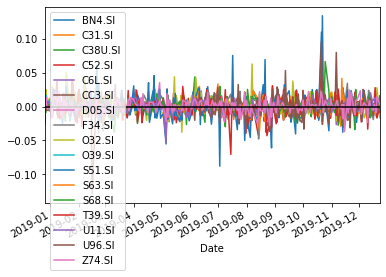

<Figure size 1152x576 with 0 Axes>

In [18]:
# plotting daily log returns
pf.comp_daily_log_returns().plot().axhline(y=0, color="black")
plt.figure(figsize = (16,8))
plt.show()

In [6]:
# pf.properties()

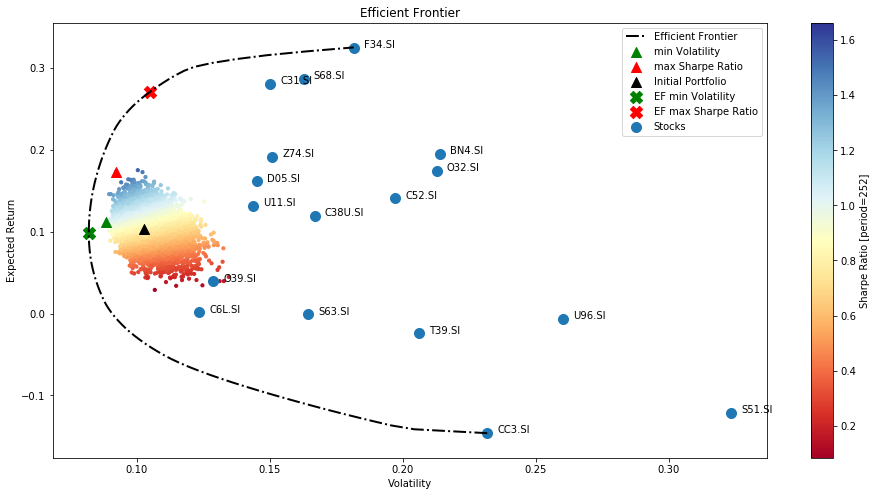

In [7]:
# Monte Carlo optimisation
opt_w, opt_res = pf.mc_optimisation(num_trials=10000)
plt.figure(figsize = (16,8))
pf.mc_plot_results()

# minimisation to compute efficient frontier and optimal portfolios along it
pf.ef_plot_efrontier()
pf.ef.plot_optimal_portfolios()

# plotting individual stocks
pf.plot_stocks()

### Find tangency portfolio

In [8]:
# optimisation for maximum Sharpe ratio
pf.ef_maximum_sharpe_ratio(verbose=True)

----------------------------------------------------------------------
Optimised portfolio for Maximum Sharpe Ratio

Time window/frequency: 252
Risk free rate: 0.02
Expected annual Return: 0.271
Annual Volatility: 0.105
Sharpe Ratio: 2.390

Optimal weights:
                  BN4.SI    C31.SI   C38U.SI        C52.SI        C6L.SI  \
Allocation  3.600927e-16  0.233515  0.044027  1.104692e-16  2.612990e-16   

                  CC3.SI        D05.SI    F34.SI    O32.SI        O39.SI  \
Allocation  3.423933e-16  3.449425e-16  0.251581  0.047401  3.503796e-16   

                  S51.SI        S63.SI    S68.SI        T39.SI        U11.SI  \
Allocation  3.209315e-15  7.861055e-16  0.302493  6.344059e-16  2.395845e-16   

                  U96.SI    Z74.SI  
Allocation  1.514429e-15  0.120982  
----------------------------------------------------------------------


,Allocation
BN4.SI,3.600927e-16
C31.SI,2.335148e-01
C38U.SI,4.402738e-02
C52.SI,1.104692e-16
C6L.SI,2.612990e-16
CC3.SI,3.423933e-16
D05.SI,3.449425e-16
F34.SI,2.515811e-01
O32.SI,4.740148e-02
O39.SI,3.503796e-16


In [9]:
w_tangency = pf.ef_maximum_sharpe_ratio()

In [10]:
round(w_tangency.sort_values(by = 'Allocation', ascending=False),2)

,Allocation
S68.SI,0.30
F34.SI,0.25
C31.SI,0.23
Z74.SI,0.12
O32.SI,0.05
C38U.SI,0.04
S51.SI,0.00
U96.SI,0.00
S63.SI,0.00
T39.SI,0.00


In [11]:
w_tangency[w_tangency['Allocation'] > 1e-10].index.values.tolist()

['C31.SI', 'C38U.SI', 'F34.SI', 'O32.SI', 'S68.SI', 'Z74.SI']

### Re-plot with only stocks with positive weight

In [12]:
df2 = df.filter(w_tangency[w_tangency['Allocation'] > 1e-10].index.values.tolist(), axis=1)

In [13]:
df2

,C31.SI,C38U.SI,F34.SI,O32.SI,S68.SI,Z74.SI
Date,,,,,,
2018-12-24,NaN,2.187599,3.016318,1.539247,6.868008,2.792019
2018-12-26,NaN,2.187599,3.006588,1.520007,6.800580,2.754032
2018-12-27,NaN,2.168410,3.035778,1.558488,6.848743,2.792019
2018-12-28,NaN,2.178005,3.055238,1.568108,6.858375,2.792019
2018-12-31,NaN,2.168410,3.035778,1.587349,6.887273,2.782522
...,...,...,...,...,...,...
2019-12-17,3.67,2.410000,4.080000,1.770000,8.980000,3.312000
2019-12-18,3.67,2.420000,4.080000,1.790000,8.950000,3.310000
2019-12-19,3.72,2.410000,4.090000,1.770000,9.040000,3.280000


In [14]:
# Build portfolio
pf2 = build_portfolio(data=df2)
pf2.risk_free_rate = 0.02

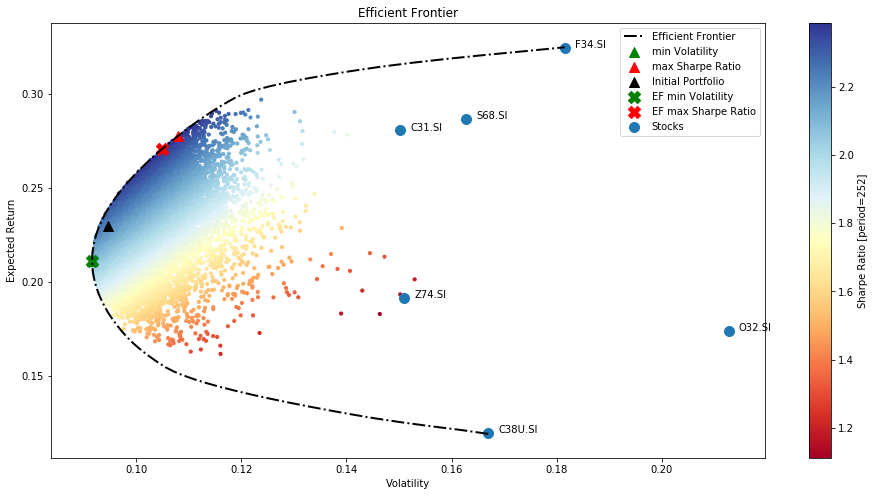

In [15]:
# Monte Carlo optimisation
opt_w, opt_res = pf2.mc_optimisation(num_trials=10000)
plt.figure(figsize = (16,8))
pf2.mc_plot_results()

# minimisation to compute efficient frontier and optimal portfolios along it
pf2.ef_plot_efrontier()
pf2.ef.plot_optimal_portfolios()

# plotting individual stocks
pf2.plot_stocks()

In [16]:
# # how much of each stock to buy?
# capital = 10000

# from pypfopt.discrete_allocation import DiscreteAllocation, get_latest_prices

# latest_prices = get_latest_prices(df)

# da = DiscreteAllocation(raw_weights, latest_prices, total_portfolio_value=capital)
# allocation, leftover = da.lp_portfolio()
# print("Discrete allocation:", allocation)
# print("Funds remaining: ${:.2f}".format(leftover))